In [1]:
import pandas as pd
import seaborn as sns
import os
import utils
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
raw_data = pd.read_csv(os.path.join('data','raw_responses.csv'))
if not os.path.exists('figures'):
    os.makedirs('figures') #for outputs

/Users/eweisbar/Desktop/github/2024_Survey/utils.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('',inplace=True)


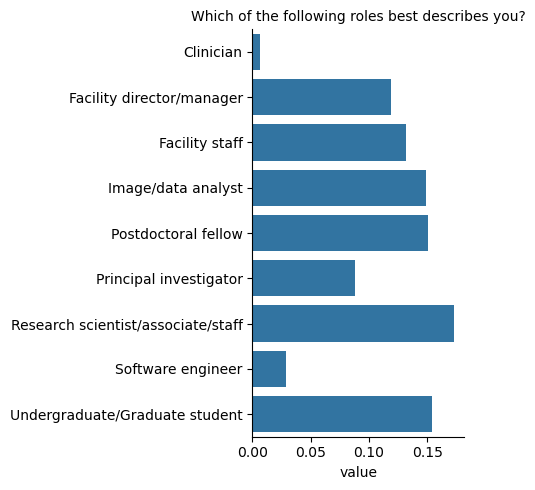

In [3]:
# question is multiselect
utils.select_all_that_apply_hist_facet(raw_data,'Which of the following roles best describes you?', os.path.join('figures','Demographics_roles.png'),how='single')

In [4]:
slice = raw_data.loc[raw_data['Which of the following roles best describes you?'].str.contains(',')]
print(f"{len(slice)} out of {len(raw_data)} respondents selected multiple roles")
ia_slice = slice.loc[slice['Which of the following roles best describes you?'].str.contains('analyst')]
print(f"{len(ia_slice)} out of {len(slice)} multi-roles include image analyst")

97 out of 483 respondents selected multiple roles
67 out of 97 multi-roles include image analyst


/var/folders/zd/wz65pr5j3pz0sjgnjn4j4fn80000gp/T/ipykernel_45616/916323426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ia_slice['Which of the following roles best describes you?'] = ia_slice['Which of the following roles best describes you?'].str.replace(', Image/data analyst','',regex=True)
/var/folders/zd/wz65pr5j3pz0sjgnjn4j4fn80000gp/T/ipykernel_45616/916323426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ia_slice['Which of the following roles best describes you?'] = ia_slice['Which of th

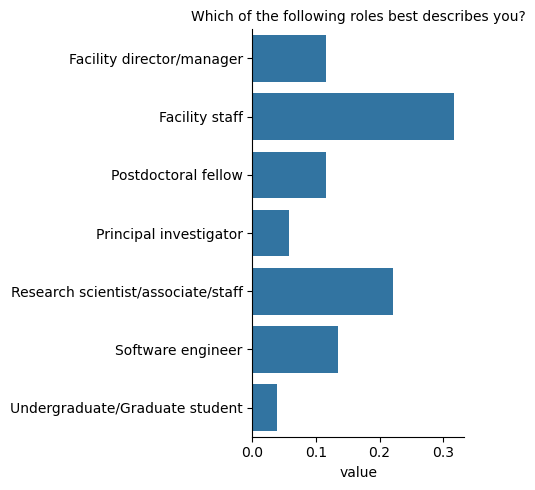

In [5]:
# For those that report "Image/data analyst", what are other roles they report?
ia_slice['Which of the following roles best describes you?'] = ia_slice['Which of the following roles best describes you?'].str.replace(', Image/data analyst','',regex=True)
ia_slice['Which of the following roles best describes you?'] = ia_slice['Which of the following roles best describes you?'].str.replace('Image/data analyst, ','',regex=True)
utils.select_all_that_apply_hist_facet(ia_slice,'Which of the following roles best describes you?',os.path.join('figures','Demographics_roles_only_IA.png'),how='single')

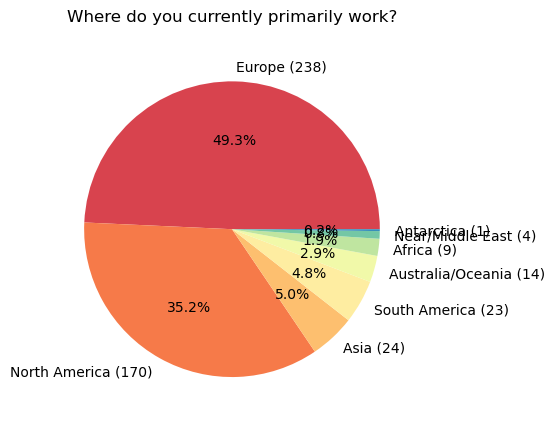

In [6]:
# Single select
utils.single_select(raw_data, 'Where do you currently primarily work?', os.path.join('figures','Demographics_where_work_pie.png'), type='pie')

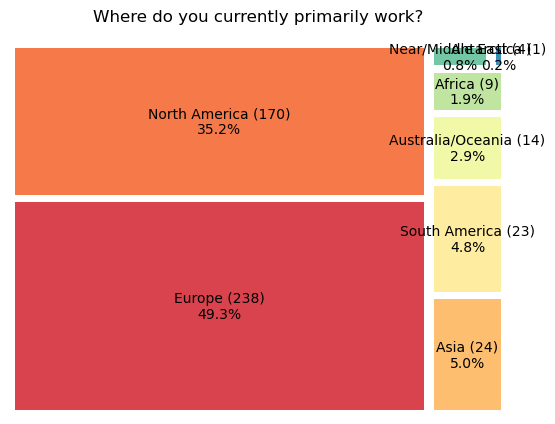

In [7]:
# Single select
utils.single_select(raw_data, 'Where do you currently primarily work?', os.path.join('figures','Demographics_where_work_square.png'), type='square')

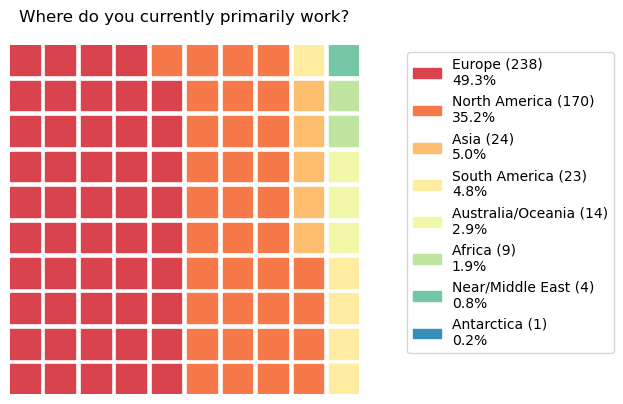

In [8]:
# Single select
utils.single_select(raw_data, 'Where do you currently primarily work?', os.path.join('figures','Demographics_where_work_waffle.png'), type='waffle')